In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #adjusts the configuration of the plots I create

#Read in the data

df=pd.read_csv(r'/Users/shekharsingh/Library/CloudStorage/OneDrive-Personal/Data Project 04.29/Python Project/movies.csv')

In [ ]:
#DataCheck

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))



In [ ]:
#DataTypes for columns
df.dtypes

In [22]:
#change data type of the columns
df['budget'] = df['budget'].astype(pd.Int64Dtype())
df['gross'] = df['gross'].astype(pd.Int64Dtype())
df['votes']=df['votes'].astype(pd.Int64Dtype())



In [ ]:
df

In [11]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('/Users/shekharsingh/Library/CloudStorage/OneDrive-Personal/Data Project 04.29/Python Project/movies.csv')

# Extract the country from the released column and create a new column for it
df['country'] = df['released'].str.extract(r'\((.*?)\)')

# Define a function to extract the date from the released column
def extract_date(date_str):
    if isinstance(date_str, str):
        match = re.search(r'(\w+ \d+, \d+)', date_str)
        if match:
            return match.group(0)
    return None

# Extract the date from the released column
df['released'] = df['released'].apply(extract_date)

# Convert the extracted date to the desired format (yyyy-mm-dd)
df['released'] = pd.to_datetime(df['released']).dt.strftime('%Y-%m-%d')

# Overwrite the original CSV file with the modified dataframe
df.to_csv('/Users/shekharsingh/Library/CloudStorage/OneDrive-Personal/Data Project 04.29/Python Project/movies.csv', index=False)


In [ ]:
#create correct year column
df['yearcorrect']=df['released'].astype(str).str[:4]
df

In [26]:
df=df.sort_values(by=['gross'],inplace=False, ascending=False)

In [52]:
pd.set_option('display.max_rows',None)


In [20]:
#Drop any duplicates

df.drop_duplicates(subset='name',keep='first',inplace=True)

In [ ]:
df

In [23]:
#Budget high correlation
#company high correlation

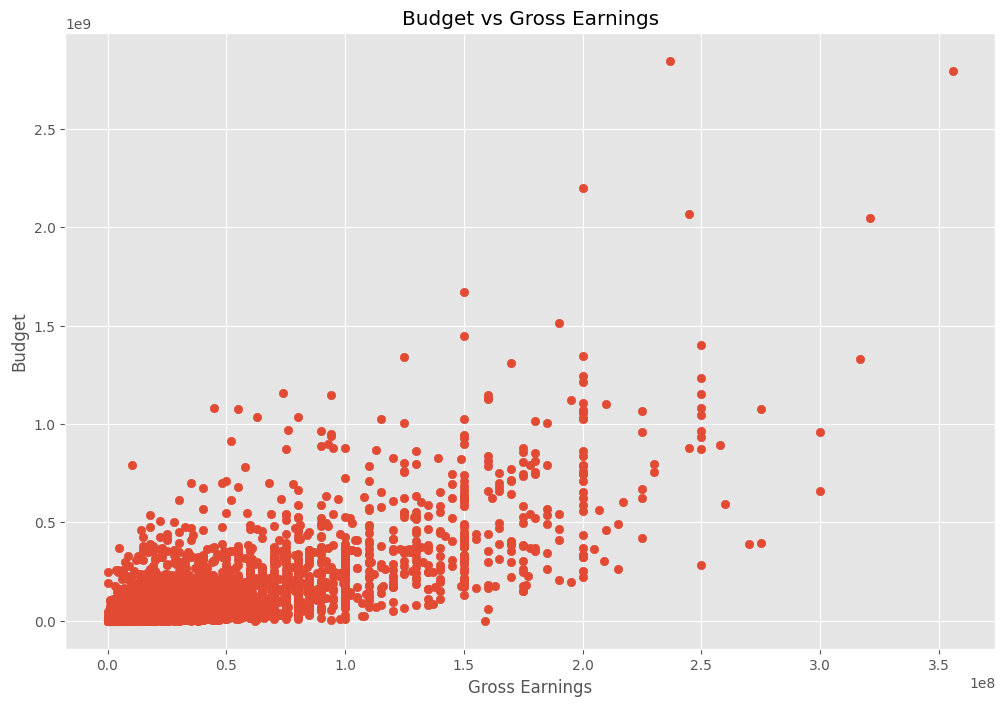

In [29]:
#scatter plot with budget vs gross ravenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel("Gross Earnings")
plt.ylabel("Budget")
plt.show()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.head()

<Axes: xlabel='budget', ylabel='gross'>

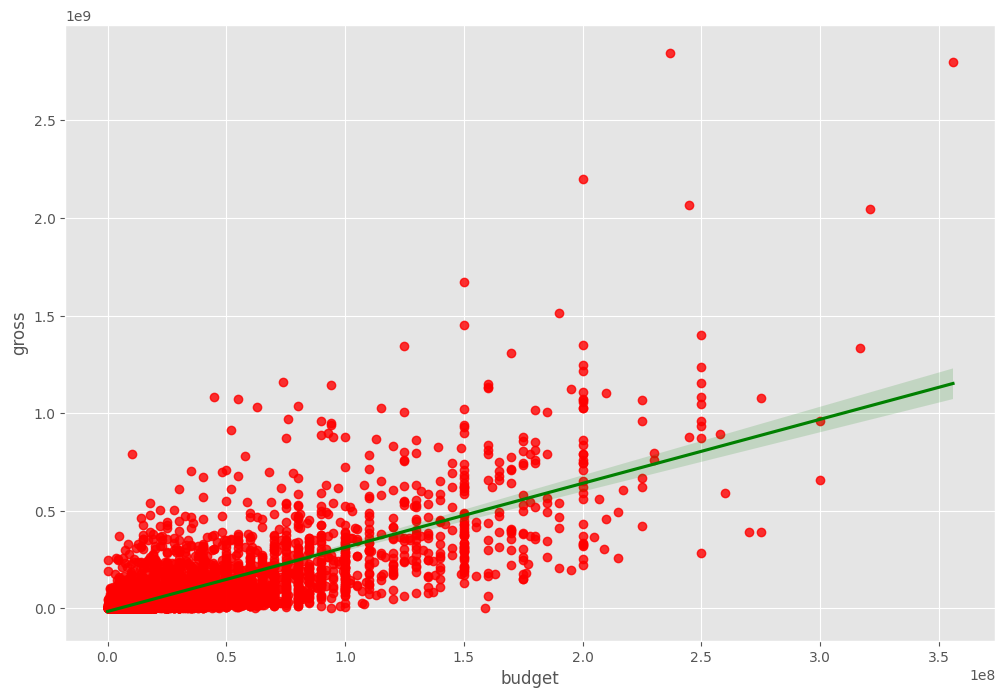

In [32]:
#plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"green"})

In [ ]:
#High Correlation between budget and gross

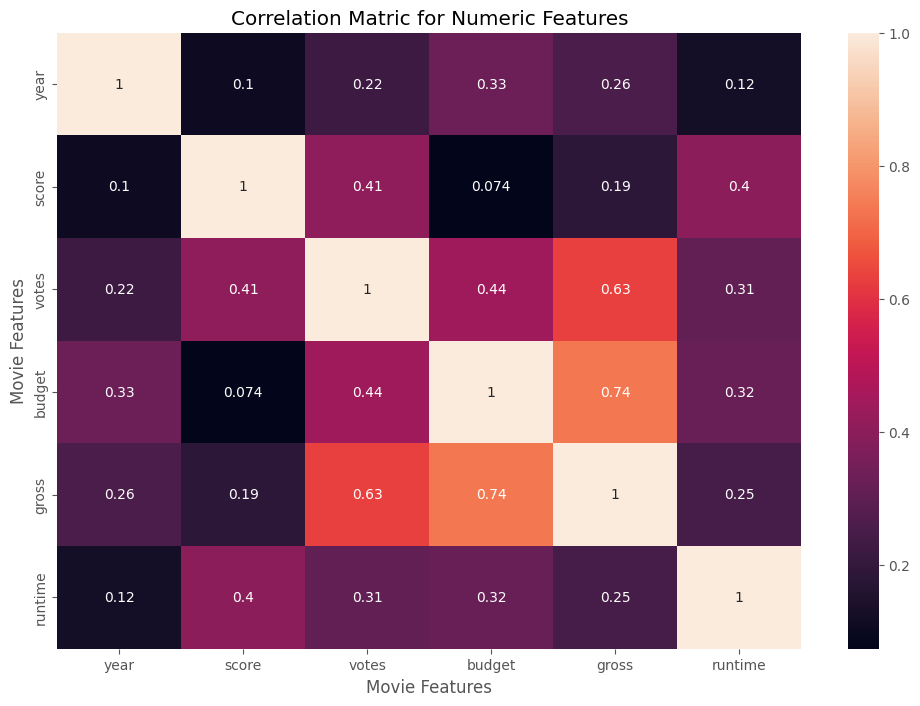

In [40]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [ ]:
#Looks at Company
df.head()

In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized

In [ ]:
df

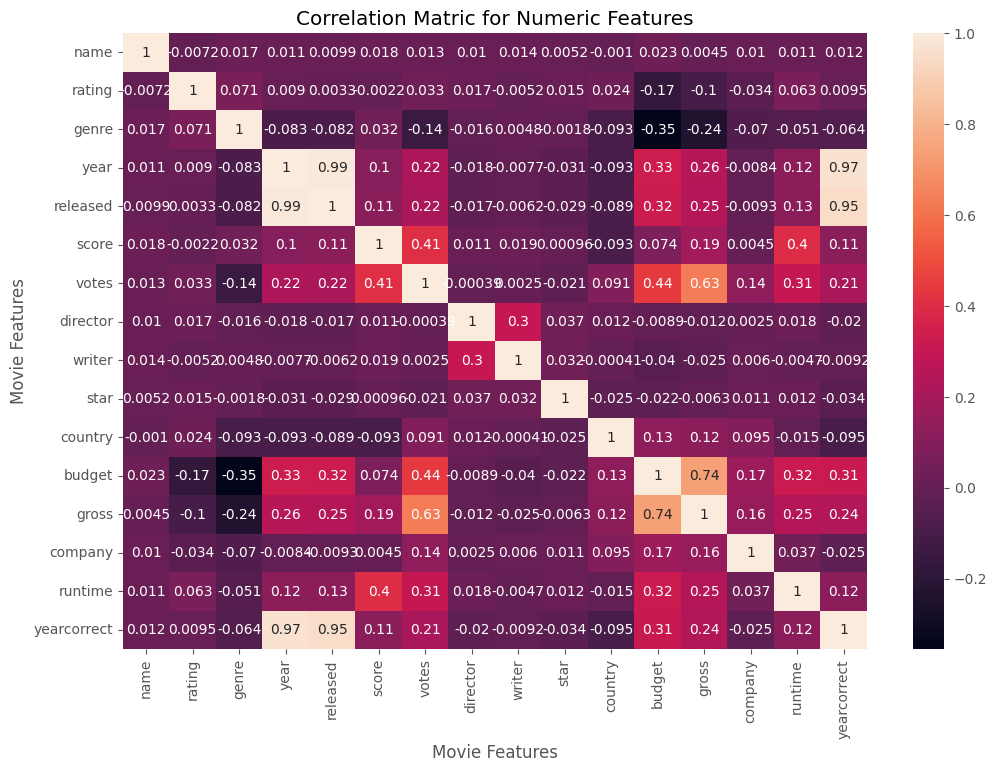

In [57]:
correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [ ]:
df_numerized.corr()

In [ ]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

In [ ]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

In [62]:
#Votes and Budget have the highest correlation to gross earning
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross         0.63
gross        votes         0.63
             budget        0.74
budget       gross         0.74
released     yearcorrect   0.95
yearcorrect  released      0.95
year         yearcorrect   0.97
yearcorrect  year          0.97
released     year          0.99
year         released      0.99
name         name          1.00
company      company       1.00
gross        gross         1.00
budget       budget        1.00
country      country       1.00
star         star          1.00
writer       writer        1.00
director     director      1.00
votes        votes         1.00
score        score         1.00
released     released      1.00
year         year          1.00
genre        genre         1.00
rating       rating        1.00
runtime      runtime       1.00
yearcorrect  yearcorrect   1.00
dtype: float64